In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("std_data.csv", header=0, sep=",", usecols=[0,1,2,3,4,5,6])
df.head()

,Disease,County,Year,Sex,Cases,Population,Rate
0,Chlamydia,California,2001,Female,75941.0,17339700,438.0
1,Chlamydia,California,2001,Male,24885.0,17173042,144.9
2,Chlamydia,California,2001,Total,101590.0,34512742,294.4
3,Chlamydia,California,2002,Female,81583.0,17554666,464.7
4,Chlamydia,California,2002,Male,28521.0,17383624,164.1


In [77]:
column_description = pd.read_excel("column_description.xlsx", sep=",",)
column_description.columns = ["Column", "Format", "Description"]
column_description

,Column,Format,Description
0,County,Plain text,The county in which the case resided when they...
1,Year,Number,Year is derived from the date closest to the d...
2,Sex,Plain text,The patient's biological sex at birth. Female ...
3,Cases,Number,The number of occurrences of each disease that...
4,Population,Number,The estimated population size (rounded to the ...
5,Rate,Number,"The rate of disease per 100,000 population for..."


In [78]:
type_stds = df["Disease"].unique()
n_stds = len(type_stds)

counties = df["County"].unique()
n_counties = len(counties)

years = df["Year"].unique()
n_years = len(years)

sex = df["Sex"].unique()

print("There were " + str(n_stds) + " types of STD's studied in", sex[0]+"s","and", sex[1]+"s: ", ', '.join([str(elem) for elem in list(type_stds)]))
print("This study was done in " + str(n_counties) + " American counties")
print("This study was monitored over", n_years, "years, starting from", min(years), "untill", max(years))

There were 3 types of STD's studied in Females and Males:  Chlamydia, Early Syphilis, Gonorrhea
This study was done in 59 American counties
This study was monitored over 18 years, starting from 2001 untill 2018


In [79]:
gb_ziekte = df.groupby('Disease')
cases_sum = gb_ziekte['Cases'].agg('sum')
cases_per_std = list(cases_sum)   

C:\Users\Nicky Kromdijk\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


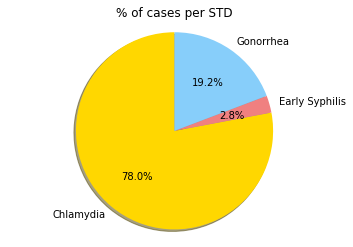

In [80]:
# Data to plot
labels = type_stds
sizes = [cases_per_std]
colors = ['gold', 'lightcoral', 'lightskyblue']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.title("% of cases per STD")
plt.axis('equal')
plt.show()
